# Car Dekho Regression
<font color='blue'> second hand Car Price Prediction

### Importing libraries

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading dataset

In [98]:
df1=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df1.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [99]:
df2=pd.read_csv('Car details v3.csv')
df2.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


In [100]:
df1['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [101]:
df2['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [102]:
df2.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [103]:
df1.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [104]:
df1= df1.loc[:,['name','year','selling_price','km_driven','seller_type','fuel','transmission','owner']]
df2= df2.loc[:,['name','year','selling_price','km_driven','seller_type','fuel','transmission','owner']]

In [105]:
df=df1.append([df2])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12468 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           12468 non-null  object
 1   year           12468 non-null  int64 
 2   selling_price  12468 non-null  int64 
 3   km_driven      12468 non-null  int64 
 4   seller_type    12468 non-null  object
 5   fuel           12468 non-null  object
 6   transmission   12468 non-null  object
 7   owner          12468 non-null  object
dtypes: int64(3), object(5)
memory usage: 876.7+ KB


## Data Analysis

### Checking for first 5 names of car in the data

In [106]:
df['name'].head(5)

0               Maruti 800 AC
1    Maruti Wagon R LXI Minor
2        Hyundai Verna 1.6 SX
3      Datsun RediGO T Option
4       Honda Amaze VX i-DTEC
Name: name, dtype: object

### Checking car which are selling the most

In [107]:
car_count=df['name'].value_counts().sort_values(ascending=False)
car_count

Maruti Swift Dzire VDI          198
Maruti Alto 800 LXI             141
Maruti Alto LXi                 118
Maruti Swift VDI                 88
Maruti Swift VDI BSIV            88
                               ... 
Tata Indigo CS Emax CNG GLX       1
Honda Civic 1.8 V MT Inspire      1
Maruti Gypsy King Soft Top        1
Maruti Wagon R VX                 1
Honda Jazz Basic                  1
Name: name, Length: 2511, dtype: int64

### Data visualization of the 5 cars selling the most

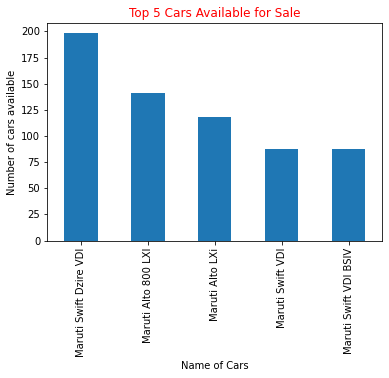

In [108]:
a=car_count.head(5).plot(kind='bar')
plt.title('Top 5 Cars Available for Sale',color='red')
plt.xlabel('Name of Cars')
plt.ylabel('Number of cars available')
plt.show()

#### Name and specifications of  the most expensive car available for sale

In [109]:
df[df['selling_price']==df['selling_price'].max()]

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Individual,Petrol,Automatic,First Owner


#### Name and specifications of the least expensive car available for sale

In [110]:
df[df['selling_price']==df['selling_price'].min()]

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
2662,Ford Ikon 1.6 ZXI NXt,2005,20000,25000,Individual,Petrol,Manual,Second Owner


### List of cars available for sale using Petrol

In [111]:
petrol_car=df[df['fuel']=='Petrol']
petrol_car.head(10)

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Individual,Petrol,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,Petrol,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Individual,Petrol,Manual,First Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Individual,Petrol,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Individual,Petrol,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Individual,Petrol,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Individual,Petrol,Manual,First Owner
10,Chevrolet Sail 1.2 Base,2015,260000,35000,Individual,Petrol,Manual,First Owner
11,Tata Indigo Grand Petrol,2014,250000,100000,Individual,Petrol,Manual,First Owner
12,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Dealer,Petrol,Automatic,First Owner


#### Most expensive car available for sale using petrol 

In [112]:
petrol_car[petrol_car['selling_price']==petrol_car['selling_price'].max()]

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Individual,Petrol,Automatic,First Owner


#### Least Expensive car available for sale using Petrol

In [113]:
petrol_car[petrol_car['selling_price']==petrol_car['selling_price'].min()]

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
2662,Ford Ikon 1.6 ZXI NXt,2005,20000,25000,Individual,Petrol,Manual,Second Owner


### List of cars available for sale which works on Electricity

In [114]:
electric_cars=df[df['fuel']=='Electric']
electric_cars

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
4145,Toyota Camry Hybrid,2006,310000,62000,Dealer,Electric,Automatic,Second Owner


### List of cars available for sale using Diesel

In [115]:
diesel_cars=df[df['fuel']=='Diesel']
diesel_cars.head(10)

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,Diesel,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,Diesel,Manual,Second Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,Diesel,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,Diesel,Manual,Second Owner
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,Dealer,Diesel,Manual,First Owner
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000,33000,Individual,Diesel,Manual,Second Owner
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Dealer,Diesel,Automatic,First Owner
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,Dealer,Diesel,Automatic,First Owner
31,Maruti Vitara Brezza ZDi Plus AMT,2018,975000,4500,Dealer,Diesel,Automatic,First Owner
32,Audi Q5 2.0 TDI,2011,1190000,175900,Dealer,Diesel,Automatic,First Owner


#### Most expensive selling car using Diesel

In [116]:
diesel_cars[diesel_cars['selling_price']==diesel_cars['selling_price'].max()]

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Dealer,Diesel,Automatic,First Owner


#### Least Expensive car available for sale using Diesel

In [117]:
diesel_cars[diesel_cars['selling_price']==diesel_cars['selling_price'].min()]

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
5674,Tata Indica DLX,2003,40000,70000,Individual,Diesel,Manual,First Owner


### List of Selling cars using operating on LPG

In [118]:
lpg_cars=df[df['fuel']=='LPG']
lpg_cars.head(10)

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
157,Maruti Wagon R DUO LPG,2014,210000,90000,Individual,LPG,Manual,First Owner
222,Maruti Omni LPG CARGO BSIII W IMMOBILISER,2009,80000,90000,Individual,LPG,Manual,Second Owner
483,Hyundai EON LPG Magna Plus,2012,180000,90000,Individual,LPG,Manual,First Owner
495,Hyundai Santro Xing GLS Audio LPG,2012,250000,100000,Individual,LPG,Manual,First Owner
657,Hyundai i10 Magna LPG,2013,250000,88600,Individual,LPG,Manual,First Owner
703,Hyundai Santro Xing GL Plus LPG,2011,229999,60000,Individual,LPG,Manual,Second Owner
1355,Maruti Wagon R LXI LPG BSIV,2012,220000,80000,Individual,LPG,Manual,Second Owner
1435,Hyundai i10 Magna LPG,2014,290000,29000,Individual,LPG,Manual,First Owner
1670,Maruti Wagon R LXI DUO BS IV,2012,180000,60000,Individual,LPG,Manual,First Owner
1699,Maruti Omni 5 Str STD LPG,1998,50000,35000,Individual,LPG,Manual,Second Owner


#### How many cars are selling which operate on LPG

In [119]:
len(lpg_cars)

61

#### Which Cars are available for sale using LPG the most

In [120]:
lpg_car_count=lpg_cars['name'].value_counts().sort_values(ascending=False)
lpg_car_count

Maruti Wagon R LXI DUO BSIII                 10
Maruti Wagon R Duo Lxi                        7
Hyundai i10 Magna LPG                         6
Maruti Wagon R LXI LPG BSIV                   5
Maruti Omni LPG STD BSIV                      4
Hyundai Santro Xing GLS LPG                   4
Maruti Omni LPG CARGO BSIII W IMMOBILISER     4
Hyundai EON LPG Magna Plus                    3
Hyundai Santro Xing GL Plus LPG               3
Maruti Wagon R LXI DUO BS IV                  2
Hyundai Santro Xing GL LPG                    1
Maruti Wagon R DUO LPG                        1
Chevrolet Spark 1.0 LT LPG                    1
Hyundai Accent Executive LPG                  1
Hyundai i10 LPG                               1
Hyundai Santro Xing GLS Audio LPG             1
Maruti 800 DUO AC LPG                         1
Maruti Omni 5 Str STD LPG                     1
Hyundai EON LPG Era Plus                      1
Chevrolet Spark 1.0 PS LPG                    1
Chevrolet Beat LT LPG                   

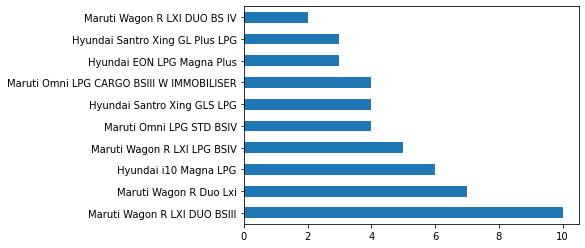

In [121]:
lpg_car_count.head(10).plot(kind='barh')


#### Fuel wise cars selling count

In [122]:
fuel_wise_count=df.groupby('fuel').fuel.count().sort_values(ascending=False)
fuel_wise_count

fuel
Diesel      6555
Petrol      5754
CNG           97
LPG           61
Electric       1
Name: fuel, dtype: int64

##### Visualization

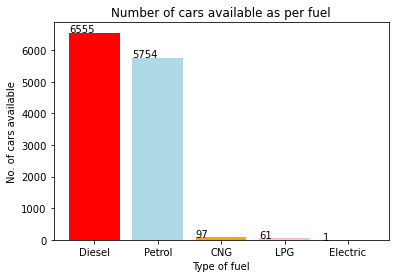

In [123]:
color_list=['red','lightblue','orange','pink','grey']
a=plt.bar(fuel_wise_count.index,fuel_wise_count.values,color=color_list)
plt.xlabel('Type of fuel')
plt.ylabel('No. of cars available')
plt.title('Number of cars available as per fuel')
for val in a:
    height=val.get_height()
    plt.text(val.get_x(),1.004*height,height)
plt.show()

In [124]:
df.head(2)

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Individual,Petrol,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,Petrol,Manual,First Owner


### Owner wise count

In [125]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [126]:
df.groupby('owner').owner.count().sort_values(ascending=False)

owner
First Owner             8121
Second Owner            3211
Third Owner              859
Fourth & Above Owner     255
Test Drive Car            22
Name: owner, dtype: int64

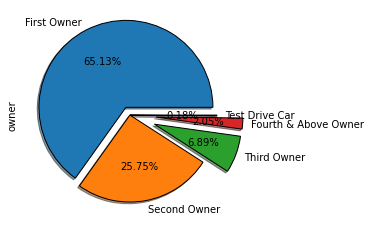

In [127]:
df.groupby('owner').owner.count().sort_values(ascending=False).plot(kind='pie',autopct='%.2f%%',explode=(0.1,0,0.3,0.3,0)
                                                                    ,shadow=True,wedgeprops = {'linewidth': 1,'edgecolor':'k'})

### Type of transmission

In [128]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [129]:
df.groupby('transmission').transmission.count().sort_values(ascending=False)

transmission
Manual       10970
Automatic     1498
Name: transmission, dtype: int64

#### Checking for the list of mannual cars available for sale

In [130]:
manual_cars=df[df['transmission']=='Manual']
manual_cars

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Individual,Petrol,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,Petrol,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,Diesel,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Individual,Petrol,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,Diesel,Manual,Second Owner
...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Individual,Petrol,Manual,First Owner
8124,Hyundai Verna CRDi SX,2007,135000,119000,Individual,Diesel,Manual,Fourth & Above Owner
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Individual,Diesel,Manual,First Owner
8126,Tata Indigo CR4,2013,290000,25000,Individual,Diesel,Manual,First Owner


#### Most expensive car which is Mannual

In [131]:
manual_cars[manual_cars['selling_price']==manual_cars['selling_price'].max()]

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
1821,Toyota Fortuner 2.8 4WD MT BSIV,2018,3200000,50000,Individual,Diesel,Manual,First Owner
5647,Toyota Fortuner 2.8 4WD MT BSIV,2018,3200000,50000,Individual,Diesel,Manual,First Owner


#### Least expensive car in Manual

In [132]:
manual_cars[manual_cars['selling_price']==manual_cars['selling_price'].min()]

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
2662,Ford Ikon 1.6 ZXI NXt,2005,20000,25000,Individual,Petrol,Manual,Second Owner


### Type of seller

In [133]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [134]:
seller_type_count=df.groupby('seller_type')['seller_type'].count().sort_values(ascending=False)
seller_type_count

seller_type
Individual          10010
Dealer               2120
Trustmark Dealer      338
Name: seller_type, dtype: int64

#### Cars being sold by the Individual

In [135]:
individual_seller=df[df['seller_type']=='Individual']
individual_seller

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Individual,Petrol,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,Petrol,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,Diesel,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Individual,Petrol,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,Diesel,Manual,Second Owner
...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Individual,Petrol,Manual,First Owner
8124,Hyundai Verna CRDi SX,2007,135000,119000,Individual,Diesel,Manual,Fourth & Above Owner
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Individual,Diesel,Manual,First Owner
8126,Tata Indigo CR4,2013,290000,25000,Individual,Diesel,Manual,First Owner


#### Cars being sold by Dealer

In [136]:
dealer_seller=df[df['seller_type']=='Dealer']
dealer_seller

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
12,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Dealer,Petrol,Automatic,First Owner
25,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Dealer,Petrol,Automatic,First Owner
26,Maruti Ciaz VXi Plus,2015,585000,24000,Dealer,Petrol,Manual,First Owner
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,Dealer,Diesel,Manual,First Owner
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Dealer,Diesel,Automatic,First Owner
...,...,...,...,...,...,...,...,...
8060,Honda City i VTEC SV,2015,575000,9599,Dealer,Petrol,Manual,First Owner
8061,Hyundai i20 Asta (o),2017,600000,35000,Dealer,Petrol,Manual,First Owner
8062,Honda City i VTEC VX Option,2016,750000,16151,Dealer,Petrol,Manual,First Owner
8063,Hyundai Creta 1.6 SX Automatic,2016,890000,40000,Dealer,Petrol,Automatic,First Owner


#### Cars being sold by Trustmark dealer

In [137]:
trustmark_dealer=df[df['seller_type']=='Trustmark Dealer']
trustmark_dealer

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
540,Maruti Swift ZXI BSIV,2016,670000,7104,Trustmark Dealer,Petrol,Manual,First Owner
541,Maruti S-Cross Zeta DDiS 200 SH,2015,750000,45974,Trustmark Dealer,Diesel,Manual,First Owner
542,Hyundai Verna 1.6 VTVT SX,2015,760000,55340,Trustmark Dealer,Petrol,Manual,First Owner
544,Renault Pulse RxL,2015,390000,61585,Trustmark Dealer,Diesel,Manual,First Owner
545,Maruti Celerio VXI AMT BSIV,2016,450000,39415,Trustmark Dealer,Petrol,Automatic,Second Owner
...,...,...,...,...,...,...,...,...
7866,Honda Jazz VX,2016,550000,56494,Trustmark Dealer,Petrol,Manual,First Owner
7867,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,79328,Trustmark Dealer,Diesel,Manual,Second Owner
7868,Maruti Swift AMT VVT VXI,2019,650000,5621,Trustmark Dealer,Petrol,Automatic,First Owner
7869,Toyota Etios VX,2017,625000,25538,Trustmark Dealer,Petrol,Manual,First Owner


##### Visualizing data on the amount of cars being sold as per the seller type

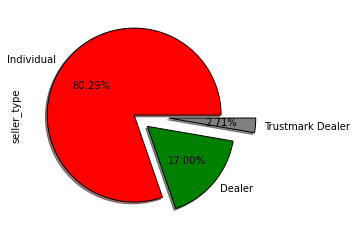

In [138]:
color_list=['red','green','grey']
seller_type_count.plot(kind='pie',autopct=('%.2f%%'),explode=(0,0.2,0.4),
                       colors=color_list,shadow=True,wedgeprops = {'linewidth': 1,'edgecolor':'k'})

plt.show()

### Year wise count about the number of cars available

In [139]:
df.groupby('year').year.count().sort_values(ascending=False)

year
2017    1484
2016    1216
2015    1197
2018    1173
2012    1066
2013    1056
2014     988
2011     863
2019     778
2010     628
2009     439
2008     359
2007     317
2006     234
2005     182
2020     122
2004     104
2003      72
2002      48
2000      34
2001      30
1999      28
1998      22
1997      14
1996       5
1995       3
1994       3
1992       1
1991       1
1983       1
Name: year, dtype: int64

In [140]:
diesel2020=df[(df['year']==2020)&(df['fuel']=='Diesel')]
diesel2020

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
289,Mahindra XUV500 W11 Option AWD,2020,1400000,25000,Dealer,Diesel,Manual,First Owner
694,Hyundai Grand i10 Nios Magna CRDi,2020,700000,1400,Individual,Diesel,Manual,First Owner
963,Audi A5 Sportback,2020,4700000,1500,Individual,Diesel,Automatic,First Owner
1002,Hyundai Creta 1.4 EX Diesel,2020,1050000,10000,Individual,Diesel,Manual,First Owner
1516,Mahindra XUV500 W11 Option AWD,2020,1400000,25000,Dealer,Diesel,Manual,First Owner
1714,Ford Freestyle Titanium Diesel,2020,784000,101,Dealer,Diesel,Manual,Test Drive Car
1716,Ford Ecosport 1.5 Diesel Titanium,2020,1000000,101,Dealer,Diesel,Manual,Test Drive Car
1778,Ford EcoSport 1.5 TDCi Titanium Plus BSIV,2020,1334000,1010,Dealer,Diesel,Manual,Test Drive Car
1780,Ford Ecosport Thunder Edition Diesel,2020,1331000,1010,Dealer,Diesel,Manual,Test Drive Car
1963,Hyundai Venue SX Opt Diesel,2020,1000000,5000,Individual,Diesel,Manual,First Owner


### ------------------------------------------------------------------------------------------------------------------------ 

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12468 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           12468 non-null  object
 1   year           12468 non-null  int64 
 2   selling_price  12468 non-null  int64 
 3   km_driven      12468 non-null  int64 
 4   seller_type    12468 non-null  object
 5   fuel           12468 non-null  object
 6   transmission   12468 non-null  object
 7   owner          12468 non-null  object
dtypes: int64(3), object(5)
memory usage: 876.7+ KB


In [142]:
df.head()

,name,year,selling_price,km_driven,seller_type,fuel,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Individual,Petrol,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,Petrol,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,Diesel,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Individual,Petrol,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,Diesel,Manual,Second Owner


## Identifying Features and Label

In [143]:
#features
X=df.loc[:,['year','km_driven','seller_type','fuel','transmission','owner']].values
X

array([[2007, 70000, 'Individual', 'Petrol', 'Manual', 'First Owner'],
       [2007, 50000, 'Individual', 'Petrol', 'Manual', 'First Owner'],
       [2012, 100000, 'Individual', 'Diesel', 'Manual', 'First Owner'],
       ...,
       [2009, 120000, 'Individual', 'Diesel', 'Manual', 'First Owner'],
       [2013, 25000, 'Individual', 'Diesel', 'Manual', 'First Owner'],
       [2013, 25000, 'Individual', 'Diesel', 'Manual', 'First Owner']],
      dtype=object)

In [144]:
#label
Y=df.iloc[:,2].values
Y

array([ 60000, 135000, 600000, ..., 382000, 290000, 290000], dtype=int64)

### Data Preprocessing

In [145]:
X

array([[2007, 70000, 'Individual', 'Petrol', 'Manual', 'First Owner'],
       [2007, 50000, 'Individual', 'Petrol', 'Manual', 'First Owner'],
       [2012, 100000, 'Individual', 'Diesel', 'Manual', 'First Owner'],
       ...,
       [2009, 120000, 'Individual', 'Diesel', 'Manual', 'First Owner'],
       [2013, 25000, 'Individual', 'Diesel', 'Manual', 'First Owner'],
       [2013, 25000, 'Individual', 'Diesel', 'Manual', 'First Owner']],
      dtype=object)

In [146]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
seller_type_encoder=LabelEncoder()
X[:,2]=seller_type_encoder.fit_transform(X[:,2])


In [238]:
seller_type_encoder.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [245]:
seller_type_encoder.inverse_transform([0,1,2])

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [147]:
fuel_encoder=LabelEncoder()
X[:,3]=fuel_encoder.fit_transform(X[:,3])

In [148]:
LE_transmission=LabelEncoder()
X[:,4]=LE_transmission.fit_transform(X[:,4])
X[:,4]

array([1, 1, 1, ..., 1, 1, 1], dtype=object)

In [149]:
LE_owner=LabelEncoder()
X[:,-1]=LE_owner.fit_transform(X[:,-1])

In [150]:
X

array([[2007, 70000, 1, 4, 1, 0],
       [2007, 50000, 1, 4, 1, 0],
       [2012, 100000, 1, 1, 1, 0],
       ...,
       [2009, 120000, 1, 1, 1, 0],
       [2013, 25000, 1, 1, 1, 0],
       [2013, 25000, 1, 1, 1, 0]], dtype=object)

### Train Test Split

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

## Applying Machine Learning algorithm

### 1.Linear Regression

In [152]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(X_train,Y_train)

LinearRegression()

In [153]:
score=[]

In [154]:
Lr_accuracy=Lr.score(X_test,Y_test)*100
score.append(Lr_accuracy)
Lr_accuracy

47.72616779041914

In [155]:
Y_test

array([250000, 700000, 515000, ..., 395000, 395000, 670000], dtype=int64)

In [156]:
Yp=Lr.predict(X_test)
Yp

array([459236.31150749, 720423.16879913, 833981.48531246, ...,
       140821.39144556, 231418.82769254, 655139.61727586])

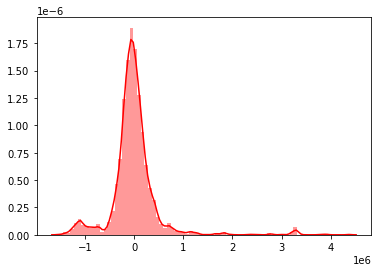

In [157]:
import seaborn as sns
sns.distplot(Y_test-Yp,color='r',bins=78)

### 2.Polynomial Regression

In [158]:
from sklearn.preprocessing import PolynomialFeatures
PF=PolynomialFeatures(degree=2)
X_poly_train=PF.fit_transform(X_train)
X_poly_test=PF.transform(X_test)

In [159]:
from sklearn.linear_model import LinearRegression
Plr=LinearRegression()
Plr.fit(X_poly_train,Y_train)

LinearRegression()

In [160]:
Yp=Plr.predict(X_poly_test)
Yp

array([436934.53149223, 674575.74943161, 863747.43185425, ...,
       163726.52577209, 280244.30774117, 590336.47727776])

In [161]:
plr_accuracy=Plr.score(X_poly_test,Y_test)*100
score.append(plr_accuracy)
plr_accuracy


62.67715763025931

### 3. Support Vector Regression

In [162]:
Y

array([ 60000, 135000, 600000, ..., 382000, 290000, 290000], dtype=int64)

In [163]:
X

array([[2007, 70000, 1, 4, 1, 0],
       [2007, 50000, 1, 4, 1, 0],
       [2012, 100000, 1, 1, 1, 0],
       ...,
       [2009, 120000, 1, 1, 1, 0],
       [2013, 25000, 1, 1, 1, 0],
       [2013, 25000, 1, 1, 1, 0]], dtype=object)

In [164]:
from sklearn.preprocessing import StandardScaler
Sc_X=StandardScaler()
Sc_Y=StandardScaler()
standard_X_train=Sc_X.fit_transform(X_train)
standard_X_test=Sc_X.transform(X_test)
standard_Y_train=Sc_Y.fit_transform(Y_train.reshape(-1,1))
standard_Y_test=Sc_Y.transform(Y_test.reshape(-1,1))

In [165]:
standard_X_train

array([[ 0.84047738, -0.51562636, -2.04551561, -0.92454842, -2.68511325,
        -0.67083596],
       [-0.12780475,  0.5691812 ,  0.3311763 , -0.92454842,  0.37242377,
         2.57437204],
       [ 0.11426578, -0.33990051,  0.3311763 , -0.92454842,  0.37242377,
        -0.67083596],
       ...,
       [-0.12780475,  0.15057243, -2.04551561, -0.92454842,  0.37242377,
        -0.67083596],
       [ 1.08254791, -0.64532321,  0.3311763 ,  1.07086294,  0.37242377,
        -0.67083596],
       [-0.12780475, -0.12430801,  0.3311763 ,  1.07086294,  0.37242377,
         0.95176804]])

In [166]:
standard_X_test

array([[ 0.84047738, -0.69922134,  0.3311763 ,  1.07086294,  0.37242377,
        -0.67083596],
       [ 0.59840685, -0.60939113,  0.3311763 , -0.92454842,  0.37242377,
        -0.67083596],
       [ 1.08254791, -1.14837238,  0.3311763 , -0.92454842,  0.37242377,
        -0.67083596],
       ...,
       [-0.61194581,  0.01942032,  0.3311763 ,  1.07086294,  0.37242377,
         0.95176804],
       [-1.09608688,  2.35500573,  0.3311763 , -0.92454842,  0.37242377,
         2.57437204],
       [ 0.35633631, -0.16024009,  0.3311763 , -0.92454842,  0.37242377,
        -0.67083596]])

In [167]:
#Actual Support Vector Regression Algo
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(standard_X_train,standard_Y_train.ravel())

SVR()

In [168]:
reg.score(standard_X_test,standard_Y_test)*100

69.77816289136818

In [169]:
score.append(reg.score(standard_X_test,standard_Y_test)*100)

In [170]:
yp=reg.predict(standard_X_test)

### 4.Decision Tree Regression

In [171]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0)
dt.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [172]:
dt_accuracy=dt.score(X_test,Y_test)*100
score.append(dt_accuracy)
dt_accuracy

61.80141049271558

In [173]:
Yp=dt.predict(X_test)
Yp

array([ 438347.7826087 ,  688461.53846154, 1100000.        , ...,
        178333.22222222,  630000.        ,  603586.17241379])

### 5.Random Forest Regression

In [174]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=300,random_state=0)
rf.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [175]:
Yp=rf.predict(X_test)
Yp

array([ 437884.61174311,  679455.22151739, 1071368.16137566, ...,
        178358.18711957,  408339.80166667,  604543.64035021])

In [176]:
rf_accuracy=rf.score(X_test,Y_test)*100
score.append(rf_accuracy)
rf_accuracy

77.99172232948263

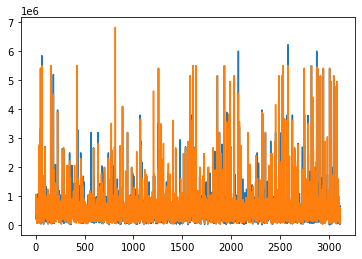

In [177]:
plt.plot(Y_test)
plt.plot(Yp)

In [178]:
score

[47.72616779041914,
 62.67715763025931,
 69.77816289136818,
 61.80141049271558,
 77.99172232948263]

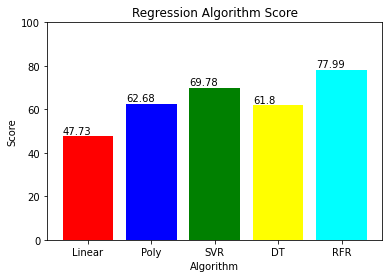

In [179]:
algo=['Linear','Poly','SVR','DT','RFR']
plt.ylim(0,100)
color_list=['red','blue','green','yellow','cyan']
plt.title('Regression Algorithm Score')
plt.xlabel('Algorithm')
plt.ylabel('Score')
val=plt.bar(algo,score,color=color_list)
for value in val:
    height=round(value.get_height(),2)
    plt.text(value.get_x(),1.02*height,height)
plt.show()

##### we saw that the best accuracy is given by the Random Forest Regression. Thats why we will use Random Forest Regression

###### We will also try to find if there is any chance to increase the accuracy

In [180]:
for i in range(43):
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)

    from sklearn.ensemble import RandomForestRegressor
    reg5 = RandomForestRegressor(n_estimators=300,random_state=0)

    reg5.fit(X_train,Y_train)


    print(i,reg5.score(X_test,Y_test) * 100)

0 77.99172232948263
1 71.62450732294788
2 74.37452936641075
3 78.65013034252668
4 83.8359902118602
5 78.78848185908856
6 78.73813022734154
7 76.678036313401
8 76.41538519629233
9 77.37412581340575
10 72.28171843484074
11 78.4974234349401
12 80.33328558645523
13 77.40813324427805
14 79.89631717916627
15 76.28560286414945
16 75.63827962247515
17 71.29435303883514
18 74.47419486787503
19 77.71943904721238
20 81.05848482351263
21 75.1062169216699
22 76.16461574871582
23 78.2938829461701
24 71.5248845739907
25 74.95955364965536
26 75.8822137844761
27 75.29259082221157
28 79.09326540392038
29 75.49399834994007
30 73.36065532805571
31 78.13771808694922
32 80.55281641270815
33 83.88207411626422
34 77.97996656851362
35 82.52151771455777
36 76.24235435133482
37 77.80930456883235
38 72.96064880728608
39 79.45992076729273
40 72.15878720357472
41 80.0142419722902
42 76.65691627569085


In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=4)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=300,random_state=0)
rfr.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [182]:
rfr.score(X_test,Y_test)*100

83.8359902118602

### GUI Prediction

In [183]:
X

array([[2007, 70000, 1, 4, 1, 0],
       [2007, 50000, 1, 4, 1, 0],
       [2012, 100000, 1, 1, 1, 0],
       ...,
       [2009, 120000, 1, 1, 1, 0],
       [2013, 25000, 1, 1, 1, 0],
       [2013, 25000, 1, 1, 1, 0]], dtype=object)

In [271]:
from tkinter import *
from tkinter import ttk
def home():
    def submitfunc():
        year=yearE.get()
        km=kmE.get()
        seller=sellerE.get()
        fuel=f.get()
        transmission=t.get()
        owner=o.get()
        print(year,km,seller,fuel,transmission,owner)
        t_seller=seller_type_encoder.transform([seller])
        t_fuel=fuel_encoder.transform([fuel])
        t_trans=LE_transmission.transform([transmission])
        t_owner=LE_owner.transform([owner])
        print(year,km,t_seller,t_fuel,t_trans,t_owner)
        price_predict=rfr.predict([[year,km,t_seller,t_fuel,t_trans,t_owner]])
        priceL=Label(win,text=round(price_predict[0],2),fg='red')
        priceL.config(font=('Times New Roman',17))
        priceL.place(x=255,y=400)
        pL=Label(win,text='Expected Selling Price:',fg='blue')
        pL.config(font=('Times New Roman',17))
        pL.place(x=10,y=400)
        button2=Button(win,text='Try Other Car',command=home,bg='blue',fg='yellow')
        button2.place(x=400,y=478)
    win=Tk()
    win.title('Second Hand Car Price Prediction')
    win.geometry('500x700+450+50')
    yearL=Label(win,text='Year')
    yearL.place(x=10,y=50)
    yearE=Entry(win,width=22)
    yearE.place(x=200,y=50)
    kmL=Label(win,text='Km Driven')
    kmL.place(x=10,y=100)
    kmE=Entry(win,width=22)
    kmE.place(x=200,y=100)
    sellerL=Label(win,text='Seller type')
    sellerL.place(x=10,y=150)
    n=StringVar()
    sellerE=ttk.Combobox(win,textvariable=n,state='readonly')
    sellerE['values']=('Individual','Dealer','Trustmark Dealer')
    sellerE.place(x=200,y=150)
    fuelL=Label(win,text='Fuel Type')
    fuelL.place(x=10,y=200)
    f=StringVar()
    fuelE=ttk.Combobox(win,textvariable=f,state='readonly')
    fuelE['values']=('Petrol','Diesel','CNG','LPG','Electric')
    fuelE.place(x=200,y=200)
    transL=Label(win,text='Transmission Type')
    transL.place(x=10,y=250)
    t=StringVar()
    transE=ttk.Combobox(win,textvariable=t,state='readonly')
    transE['values']=('Manual','Automatic')
    transE.place(x=200,y=250)
    ownerL=Label(win,text='Owner type')
    ownerL.place(x=10,y=300)
    o=StringVar()
    ownerE=ttk.Combobox(win,textvariable=o,state='readonly')
    ownerE['values']=('First Owner','Second Owner','Fourth & Above Owner','Third Owner','Test Drive Car')
    ownerE.place(x=200,y=300)
    submit=Button(win,text='Submit',font='bold',fg='red',bg='pink',border=2,width=7,command=submitfunc)
    submit.place(x=200,y=350)
    win.mainloop()
    
home()


2009 56000 Individual Petrol Manual First Owner
2009 56000 [1] [4] [1] [0]


In [250]:
seller_type_encoder.inverse_transform([0])

array(['Dealer'], dtype=object)

In [252]:
fuel_encoder.inverse_transform([4])

array(['Petrol'], dtype=object)

In [253]:
LE_transmission.inverse_transform([1])

array(['Manual'], dtype=object)

In [254]:
LE_owner.inverse_transform([2])


array(['Second Owner'], dtype=object)